In [ ]:
#Importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from math import * 
from PIL import Image
import itertools
import io
import os

#Bismillah


%matplotlib inline

In [47]:
prechantel = pd.read_csv("churn-bigml-80.csv")
prechantel_test = pd.read_csv("churn-bigml-20.csv")
prechantel.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [48]:


print("Karakteristik Data:") ; print()
print("Rows:", telcom.shape[0])
print("\nNumber of features:", telcom.shape[1])
print("\nFeatures:")
for i in (telcom.columns.tolist()):
    print("- " + i)


Karakteristik Data:

Rows: 2666

Number of features: 18

Features:
- International plan
- Voice mail plan
- Churn
- Account length
- Number vmail messages
- Total day minutes
- Total day calls
- Total day charge
- Total eve minutes
- Total eve calls
- Total eve charge
- Total night minutes
- Total night calls
- Total night charge
- Total intl minutes
- Total intl calls
- Total intl charge
- Customer service calls


In [49]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Filter Fitur yang tak dibutuhkan
col_to_drop = ['State', 'Area code']

#, 'Total day charge', 'Total eve charge', 
               #'Total night charge', 'Total intl charge'
   
prechantel = prechantel.drop(columns = col_to_drop, axis = 1)
prechantel_test = prechantel_test.drop(columns = col_to_drop, axis = 1)

# Kolom Target
target_col = ["Churn"]


cat_cols = ['Voice mail plan', 'International plan']    # Katergorikal
bin_cols = ['International plan', 'Voice mail plan', 'Churn']   #Binary
num_cols = ['Account length', 'Number vmail messages', 'Total day minutes',     
            'Total day calls', 'Total day charge', 'Total eve minutes', 
            'Total eve calls', 'Total eve charge', 'Total night minutes',
            'Total night calls', 'Total night charge', 'Total intl minutes',
            'Total intl calls', 'Total intl charge', 'Customer service calls']      #Numerik



# Inisialisasi Label Encoder dan Standard Scaler
le = LabelEncoder()
std = StandardScaler()

# Menyimpan data original
orijinal = prechantel.copy()
orijinal_test = prechantel_test.copy()

# Label encoding 
for i in bin_cols:
    prechantel[i] = le.fit_transform(prechantel[i])
    prechantel_test[i] = le.transform(prechantel_test[i])

# Konkatenasi data training dan test
comb = pd.concat((prechantel, prechantel_test), sort=False)

# Scaling kolom numerik
scaled = std.fit_transform(comb[num_cols])
scaled_df = pd.DataFrame(scaled, columns=num_cols)

# Membuang data original, digantikan dengan versi standarisasi
comb.drop(columns=num_cols, axis=1, inplace=True)
comb = comb.join(scaled_df)

# Memisahkan kembali data training dan data test
prechantel = comb[:prechantel.shape[0]]
prechantel_test = comb[prechantel.shape[0]:]



print(prechantel)

orijinal.head()


      International plan  Voice mail plan  Churn  Account length  \
0                      0                1      0        0.676489   
1                      0                1      0        0.149065   
2                      0                0      0        0.902529   
3                      1                0      0       -0.428590   
4                      1                0      0       -0.654629   
...                  ...              ...    ...             ...   
2661                   0                0      0       -0.554168   
2662                   0                1      0        2.283878   
2663                   0                0      0       -0.830437   
2664                   0                0      0       -1.835055   
2665                   0                1      0       -0.679745   

      Number vmail messages  Total day minutes  Total day calls  \
0                  1.234883           1.566767         0.476643   
1                  1.307948          -0.333738   

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score



# Mendefinisikan kolom yang digunakan  
cols = [i for i in prechantel.columns if i not in target_col]
target_col = ['Churn']


# Splitting data training dan test
x_train, x_test, y_train, y_test = train_test_split(prechantel[cols], prechantel[target_col], 
                                                    test_size = .25, random_state = 111)



Algoritma : K- Nearest Neighbor

Classification report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92       547
           1       0.86      0.21      0.34       120

    accuracy                           0.85       667
   macro avg       0.86      0.60      0.63       667
weighted avg       0.85      0.85      0.81       667

Accuracy Score: 0.8515742128935532


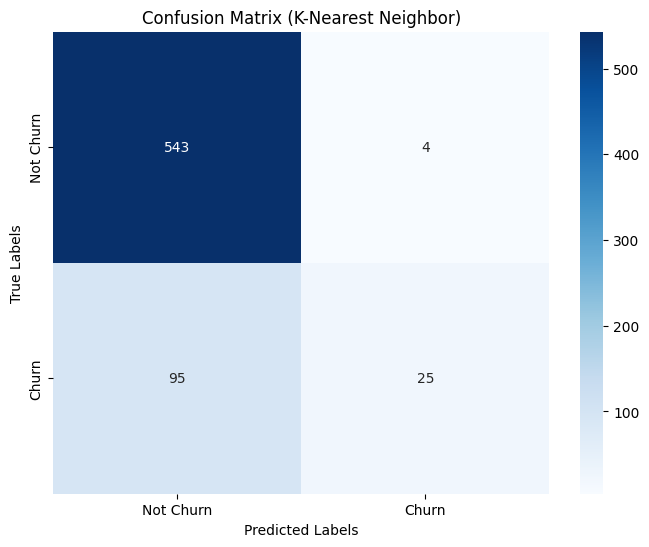

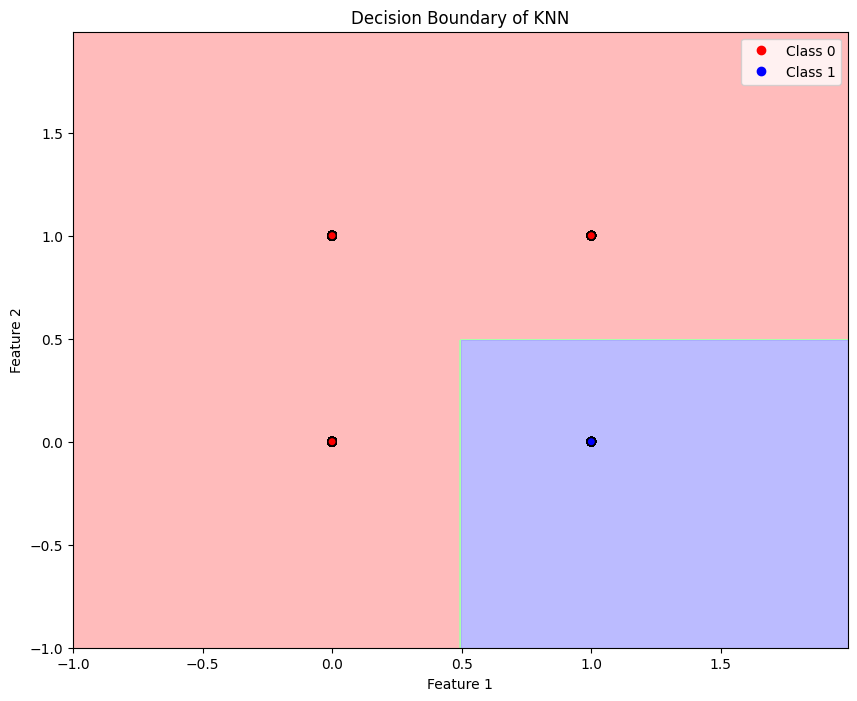

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                           weights='uniform')

knn.fit(x_train, y_train)
predictions = knn.predict(x_test)
probabilities = knn.predict_proba(x_test)

print('Algoritma : K- Nearest Neighbor')
print("\nClassification report:\n", classification_report(y_test, predictions))
print("Accuracy Score:", accuracy_score(y_test, predictions))


conf_matrix = confusion_matrix(y_test, predictions)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix (K-Nearest Neighbor)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# # Limit the features to 2 for visualization purposes
# feature_1, feature_2 = 0, 1  # Choose two features for plotting
# x_train_2d = x_train.iloc[:, [feature_1, feature_2]]
# y_train_2d = y_train

# # Create the KNN model again for the selected features
# knn_2d = KNeighborsClassifier(n_neighbors=5, weights='uniform')
# knn_2d.fit(x_train_2d, y_train_2d)

# # Define the grid for the decision boundary
# x_min, x_max = x_train_2d.iloc[:, 0].min() - 1, x_train_2d.iloc[:, 0].max() + 1
# y_min, y_max = x_train_2d.iloc[:, 1].min() - 1, x_train_2d.iloc[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
#                      np.arange(y_min, y_max, 0.01))

# # Predict on the grid
# Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

# # Plot the decision boundary
# plt.figure(figsize=(10, 8))
# cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
# cmap_bold = ['red', 'green', 'blue']

# plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)
# scatter = plt.scatter(x_train_2d.iloc[:, 0], x_train_2d.iloc[:, 1],
#                        c=y_train_2d.values.ravel(), edgecolor='k', cmap=ListedColormap(cmap_bold))
# plt.title('Decision Boundary of KNN')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.legend(handles=scatter.legend_elements()[0], labels=['Class 0', 'Class 1'])
# plt.show()


Algoritma : Gaussian Naive Bayes

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       547
           1       0.54      0.40      0.46       120

    accuracy                           0.83       667
   macro avg       0.71      0.66      0.68       667
weighted avg       0.81      0.83      0.82       667

Accuracy Score: 0.8305847076461769


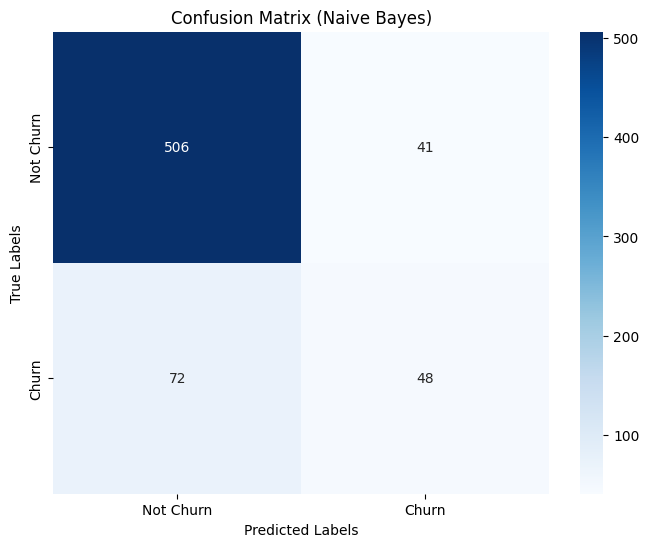

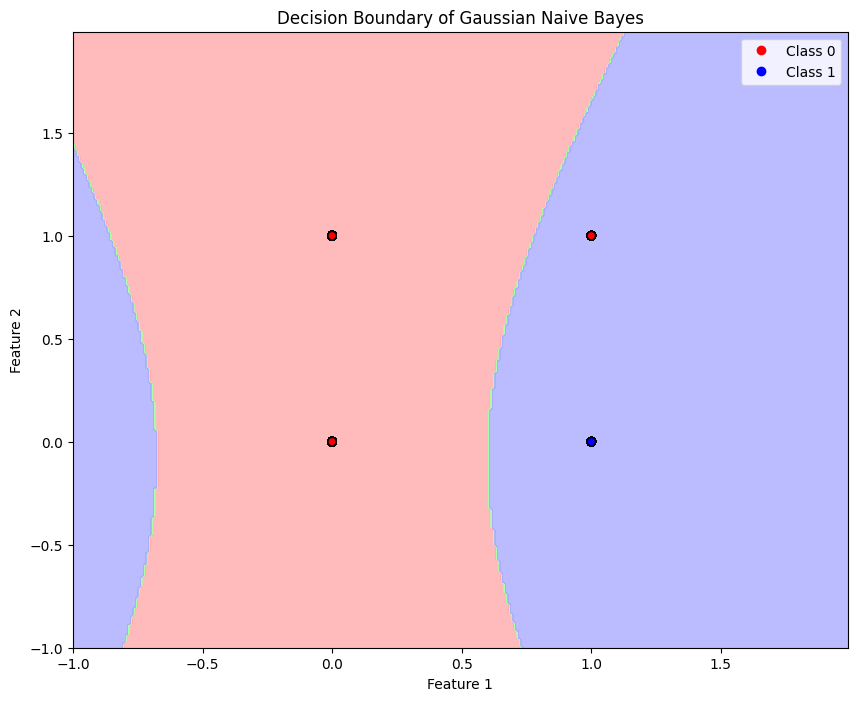

In [ ]:
# MODEL NAIVE BAYES 
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB(priors=None)

gnb.fit(x_train, y_train)
predictions = gnb.predict(x_test)
probabilities = gnb.predict_proba(x_test)

print('Algoritma : Gaussian Naive Bayes')
print("\nClassification report:\n", classification_report(y_test, predictions))
print("Accuracy Score:", accuracy_score(y_test, predictions))


conf_matrix = confusion_matrix(y_test, predictions)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix (Naive Bayes)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# # Limit the features to 2 for visualization purposes
# feature_1, feature_2 = 0, 1  # Choose two features for plotting
# x_train_2d = x_train.iloc[:, [feature_1, feature_2]]
# y_train_2d = y_train

# # Fit the Naive Bayes model on the reduced dataset
# gnb_2d = GaussianNB()
# gnb_2d.fit(x_train_2d, y_train_2d)

# # Define the grid for the decision boundary
# x_min, x_max = x_train_2d.iloc[:, 0].min() - 1, x_train_2d.iloc[:, 0].max() + 1
# y_min, y_max = x_train_2d.iloc[:, 1].min() - 1, x_train_2d.iloc[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
#                      np.arange(y_min, y_max, 0.01))

# # Predict on the grid
# Z = gnb_2d.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

# # Plot the decision boundary
# plt.figure(figsize=(10, 8))
# cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
# cmap_bold = ['red', 'green', 'blue']

# plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)
# scatter = plt.scatter(x_train_2d.iloc[:, 0], x_train_2d.iloc[:, 1],
#                        c=y_train_2d.values.ravel(), edgecolor='k', cmap=ListedColormap(cmap_bold))
# plt.title('Decision Boundary of Gaussian Naive Bayes')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.legend(handles=scatter.legend_elements()[0], labels=['Class 0', 'Class 1'])
# plt.show()


Algoritma: Decision Tree

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94       547
           1       0.79      0.65      0.71       120

    accuracy                           0.91       667
   macro avg       0.86      0.81      0.83       667
weighted avg       0.90      0.91      0.90       667

Accuracy Score: 0.9055472263868066


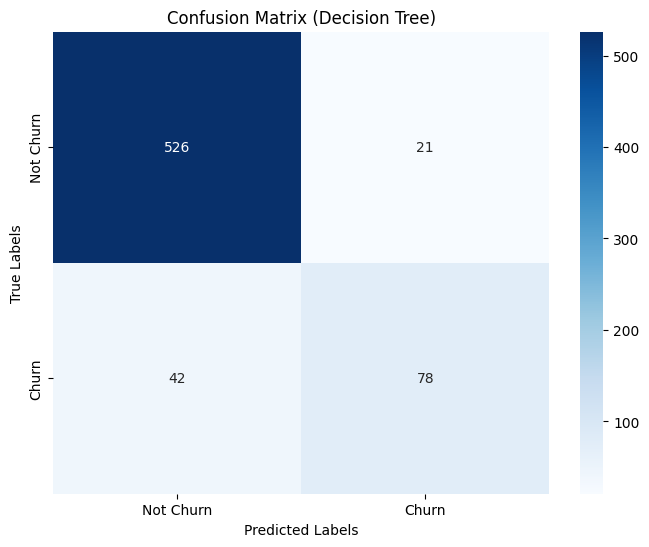

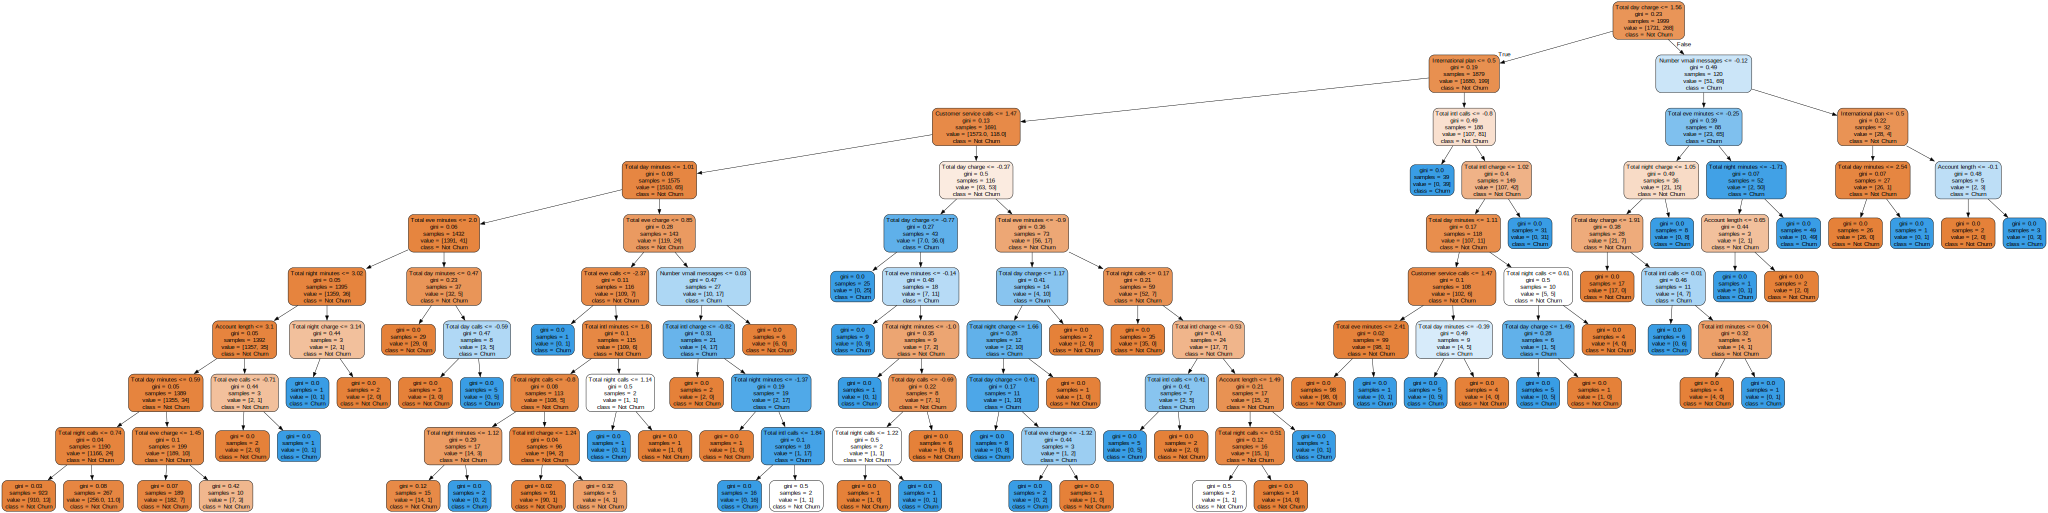

In [53]:
# MODEL DECISION TREE

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from graphviz import Source
from IPython.display import SVG, display

decision_tree = DecisionTreeClassifier(max_depth = 9, random_state = 111, splitter = "best", criterion = "gini")

decision_tree.fit(x_train, y_train)
predictions = decision_tree.predict(x_test)
probabilities = decision_tree.predict_proba(x_test)

print('Algoritma: Decision Tree')
print("\nClassification report:\n", classification_report(y_test, predictions))
print("Accuracy Score:", accuracy_score(y_test, predictions))


conf_matrix = confusion_matrix(y_test, predictions)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix (Decision Tree)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

graph = Source(tree.export_graphviz(decision_tree, out_file = None, rounded = True, 
                                    proportion = False, feature_names = cols, 
                                    precision = 2, class_names = ["Not Churn", "Churn"], 
                                    filled = True))


display(graph)



Algorithm: Logistic Regression

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       547
           1       0.52      0.13      0.21       120

    accuracy                           0.82       667
   macro avg       0.68      0.55      0.56       667
weighted avg       0.78      0.82      0.78       667

Accuracy Score: 0.8215892053973014


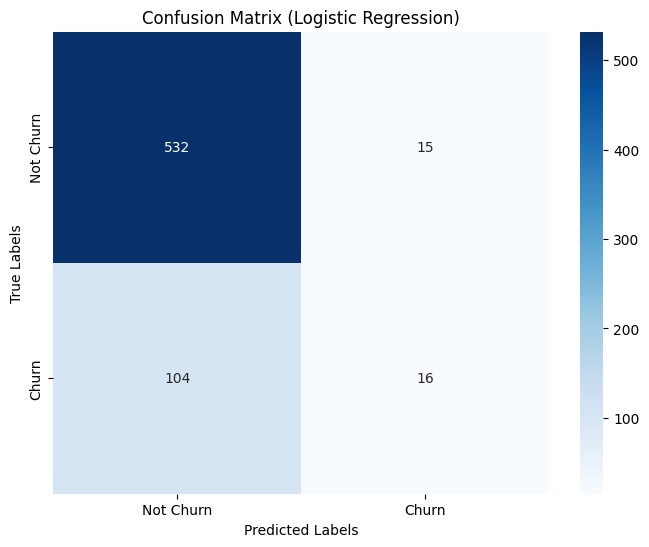

In [54]:
# MODEL LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression as lr

logreg = lr(C = 1.0, class_weight = None, dual = False, fit_intercept = True, 
            intercept_scaling = 1, max_iter = 100, multi_class = 'ovr', 
            n_jobs = 1, penalty = 'l2', random_state = None, solver = 'liblinear', 
            tol = 0.0003, verbose = 0, warm_start = False)

logreg.fit(x_train, y_train)
predictions = logreg.predict(x_test)
probabilities = logreg.predict_proba(x_test)

print('Algorithm: Logistic Regression')
print()
print("Classification report:\n", classification_report(y_test, predictions))
print("Accuracy Score:", accuracy_score(y_test, predictions))


conf_matrix = confusion_matrix(y_test, predictions)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



Algorithm: SVM Linear

Classification report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90       547
           1       0.00      0.00      0.00       120

    accuracy                           0.82       667
   macro avg       0.41      0.50      0.45       667
weighted avg       0.67      0.82      0.74       667

Accuracy Score: 0.8200899550224887


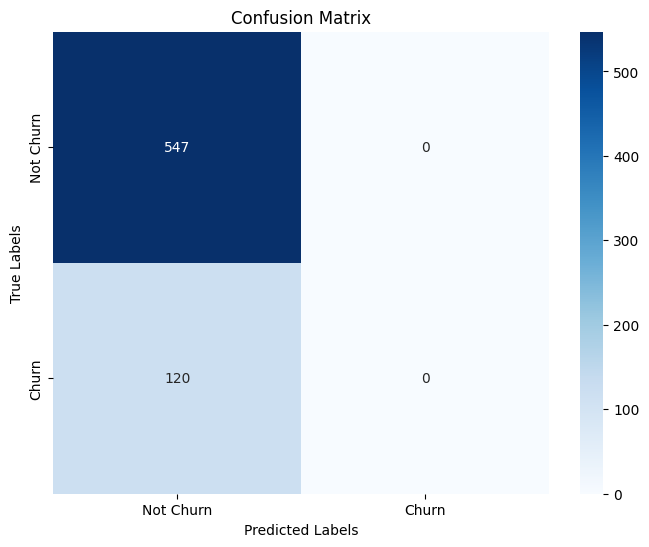

In [55]:
# MODEL Support Vector Machine (SVM)

from sklearn.svm import SVC

svm = SVC(C=1.0, kernel='linear', probability=True, random_state=123)

svm.fit(x_train, y_train)
predictions = svm.predict(x_test)
probabilities = svm.predict_proba(x_test)

print('Algorithm: SVM Linear')
print("\nClassification report:\n", classification_report(y_test, predictions))
print("Accuracy Score:", accuracy_score(y_test, predictions))


conf_matrix = confusion_matrix(y_test, predictions)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



Silhouette Score: 0.07077332835571506
Inertia (Sum of Squared Distances): 24502.048630495552
Cluster Centroids:
[[ 0.11302682  0.2816092   0.0768461  -0.00107543 -0.53453127 -0.03736754
  -0.53454478  1.00430332 -0.09498613  1.00431188 -0.34943732 -0.02283546
  -0.34945954  0.24289851  0.01302248  0.24277068 -0.03904986]
 [ 0.11394892  0.22003929 -0.05570727 -0.13226415 -0.56898887  0.07610001
  -0.56900849 -0.85828549  0.01004187 -0.85828311  0.21285589 -0.02267561
   0.21296315  0.55032324  0.05984575  0.55015915 -0.0291177 ]
 [ 0.0814664   0.28309572  0.00804001  0.00169437  0.21355793 -0.1291965
   0.21356383 -0.00889878  0.06307147 -0.00888769  0.85712506  0.11076738
   0.85711405 -0.85453221  0.01290357 -0.85410676 -0.04236923]
 [ 0.10272537  0.32704403 -0.02468963  0.12725568  0.9881446   0.06991557
   0.98814602 -0.22346939 -0.03215505 -0.22344629 -0.64876422  0.00317395
  -0.64875578  0.05130342 -0.09686014  0.05122356  0.02154552]]


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


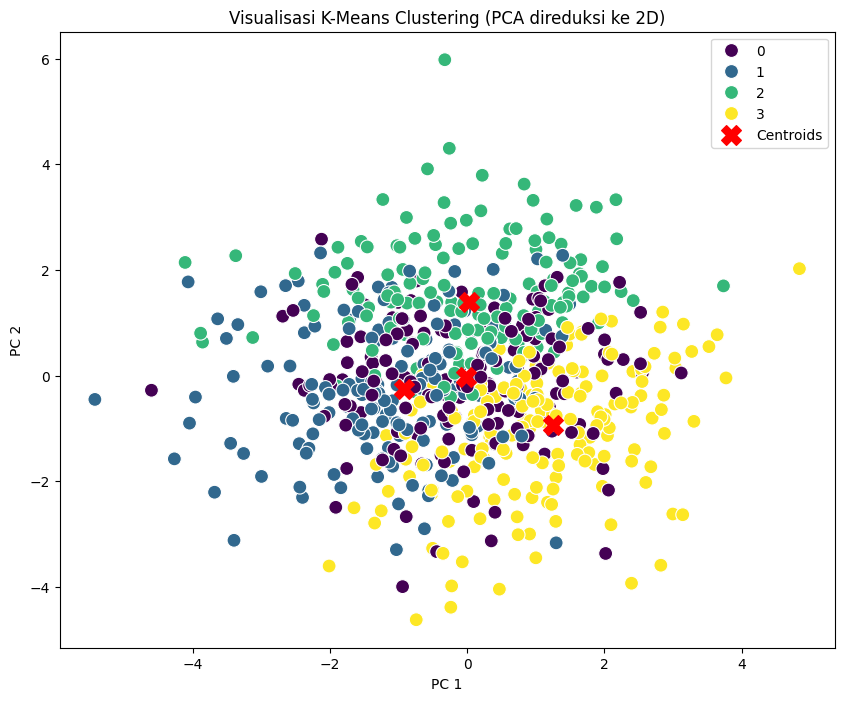

In [12]:
# MODEL K-Means Clusterring

# K-Means Clustering with Visualization
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Define the K-Means model with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=123)

# Fit the model on the training data (no target labels needed for unsupervised learning)
kmeans.fit(x_train)

# Predict cluster labels for the test data
cluster_labels = kmeans.predict(x_test)

# Evaluate the clustering performance using silhouette score
silhouette_avg = silhouette_score(x_test, cluster_labels)
print("Silhouette Score:", silhouette_avg)
# Print the inertia (sum of squared distances to the closest cluster center)
print("Inertia (Sum of Squared Distances):", kmeans.inertia_)
# Display cluster centroids
print("Cluster Centroids:")
print(kmeans.cluster_centers_)

# Visualize the clusters using PCA for dimensionality reduction (if necessary)
pca = PCA(n_components=2)
x_test_2d = pca.fit_transform(x_test)

# Scatter plot of the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=x_test_2d[:, 0], y=x_test_2d[:, 1], hue=cluster_labels, palette='viridis', s=100)
plt.scatter(
    pca.transform(kmeans.cluster_centers_)[:, 0],
    pca.transform(kmeans.cluster_centers_)[:, 1],
    color='red', marker='X', s=200, label='Centroids'
)
plt.title("Visualisasi K-Means Clustering (PCA direduksi ke 2D)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.show()
